# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [4]:
# 1. This paper is about cleaning data through the specific way of data tidying. This paper will dive into the simple framework for data tidying, tools needed, and a case study to prove the benefits.
# 2. It has been designed to start the initial exploration and analysis and simplyify analsyis tools that work well together. Tidy datsets and tools work togther to make everything easier.
# 3a. The first sentence means that tidy datsets can do its best but every dataset is differnt and will reguire unique ways of cleaning it.
# 3b. The second statement means that when data gets more complicated or longer that it is harder to determine what are observations and what are variables and want we want to be either. It can get complicated when viewing the data in different ways and ansering different questions - not clear cut. 
# 4. values - numbers (quantitative) of strings (qualatative); variable - one way a value is organized, contains all values that measure the same attribute across units; obseravtion - another way a value is organized, contains all values measured on the same unit accross attribute
# 5. Tidy data is a standard way of mapping the meaning of a datset to its structure: each variable forms a column, each observtaion forms a row, each type of observational unit forms a table
# 6a. the 5 most common problems in messy datasets is column headers are values, not variable name, multiple variables start store in one column, variables are stored in both rows and columns, multiple types of observational units are store in the same table, and a single observational unit is store in multiple tables
# 6b. The column headers are variables not titles, there are variables stored in both rows and columns
# 6c. the reuslt of melting data is turning columns into rows, it results into molten dataset
# 7. Table 11 is mesy due to having variables stored in both rows and columns - has variables in indvidual columns, spread across columns, and spread across rows. In table 12 with a tidy data it contains the max and min in one row and in the molten table we have dropped the missing values and the columns have become rows- uses the date
# 8a. The chicken and the egg probelm is that one needs tidy tools to tidy data but to tidy data one needs to understand its tidy tools; so you need both tidy tools and tidy data but both rely on eachother to work so which one comes first?
# 8b. Wickham hopes that data cleanig is studied more and improvements are made to tools and understadning of tidying data as it its a in important problem. Wickham hopes to use methodologies from fields to imporve data analsyis and to design tools to help analyze data 

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [10]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

In [11]:
#1
bnb = pd.read_csv('./data/airbnb_hw.csv')
bnb['Price'].str.replace(',','') #removing the commas out of the value to save the data above 999
bnb['Price'] = pd.to_numeric(bnb['Price'], errors='coerce') # will set missing or invalid data to NaN
bnb['Price'+'_nan'] = bnb['Price'].isnull() #creates variable to see the total number of missing values
print("Total missing values is", sum(bnb['Price_nan']))

Total missing values is 181


In [26]:
#2
df = pd.read_csv('./data/sharks.csv')
print(df['Type'].value_counts()) #called to see the unique type values
df['Type'] = df['Type'].replace(['Invalid','Sea Disaster','Watercraft','Boat','Boating','Questionable','Under investigation','Boatomg','Unconfirmed','Unverified'],np.nan) #only Types of cases keeping the data for are unprovoked or provoked; changing all other types of to nan values as do not want to remove the row of data but also do not want unnessary informtion that is not going to help the user later with random type variables 
print(df['Type'].value_counts()) #called to see the change to the type values

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Under investigation       1
Boatomg                   1
Unconfirmed               1
Unverified                1
Name: Type, dtype: int64
Unprovoked    4716
Provoked       593
Name: Type, dtype: int64


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
#3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
df['WhetherDefendantWasReleasedPretrial'] = pd.to_numeric(df['WhetherDefendantWasReleasedPretrial'], errors='coerce') #setting all invalid or missing data to nan
print(df['WhetherDefendantWasReleasedPretrial'].value_counts()) #finding all values in category of the relased pretrial
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9,np.nan) #replacing 9 with nan as only values care about are 1 or 0
print(df['WhetherDefendantWasReleasedPretrial'].value_counts()) #to see the change after missing values are put in place

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [34]:
#4
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce') #setting all invalid or missing data to nan
print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()) #to see the possible values of the sentence type
print(pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'],df['SentenceTypeAllChargesAtConvictionInContactEvent'])) #compare the sentence type and the imposed sentence, see that 9 and 4 values of setence type have a corresponding value of no sentence
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([9,4]),'ImposedSentenceAllChargeInContactEvent'] = 0 #if a 9 or 4 replace value in the imposed setence with 0
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(' ',np.nan) #removing empty space in list
 

[9 0 1 4 2]
SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2
ImposedSentenceAllChargeInContactEvent                       
0.000000                                          4953   0  0
0.032854                                             0   6  0
0.065708                                             3  21  0
0.098563                                             2   6  0
0.131417                                             4  10  0
...                                                ...  .. ..
1200.000000                                          0   0  1
1500.000000                                          0   0  1
1752.000000                                          0   0  1
1980.000000                                          0   0  1
2208.000000                                          0   0  1

[483 rows x 3 columns]
0.000000      4953
12.000000     1404
0.985626      1051
6.000000       809
3.000000       787
              ... 
11.328542        1
41.913758        1
399.00

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

13
30478


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating,price_log
Price,,,,,,,,
10.0,1.878154e+07,100.0,10840.500000,1.000000,1.0,0.666667,100.0,2.302585
20.0,1.371733e+07,80.0,10823.333333,1.000000,1.0,5.666667,81.0,2.995732
21.0,2.718749e+07,80.0,10458.000000,1.000000,1.0,1.000000,80.0,3.044522
22.0,1.438135e+07,85.0,10462.000000,1.000000,1.0,41.000000,89.0,3.091042
24.0,8.552208e+06,82.5,11213.000000,1.000000,1.0,6.000000,85.5,3.178054
...,...,...,...,...,...,...,...,...
975.0,1.151816e+07,95.0,10017.500000,6.500000,1.0,6.500000,98.0,6.882437
985.0,4.900009e+06,100.0,10012.000000,2.000000,1.0,18.000000,100.0,6.892642
995.0,9.093418e+06,90.0,10010.000000,4.666667,1.0,4.666667,90.0,6.902743


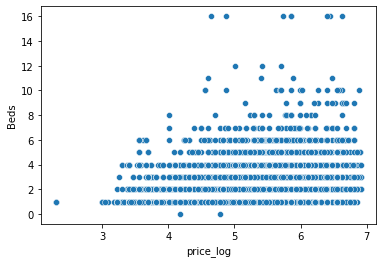

In [50]:
bnb = pd.read_csv('./data/airbnb_hw.csv')
bnb['Price'].str.replace(',','') #removing the commas out of the value to save the data above 999
bnb['Price'] = pd.to_numeric(bnb['Price'], errors='coerce') # will set missing or invalid data to NaN
print(len(bnb.columns))
print(len(bnb.index))
bnb.head()
#2 the dimmesnions of this data are 14 by 30478, there are 30478 observations, the variables are host id, host since, name, Neighbourhood, property type, review scores rating, room type, zipcode, beds, number of records, number of reviews, price, review scores rating, price_nan
pd.crosstab(bnb['Room Type'], bnb['Property Type'] )
#3 The most common type of property aviable is an an apartment for all different room types. Overall the most common type of property rented out is apartment by a landslide. It has the most avaibility compared to all other options for entire home/apt rental and private room rental. A private room is more common then the entire property for bed and breakfast, dorm, house, hut, and other
#sns.histplot(bnb['Price'])
#sns.kdeplot(bnb['Price'])
#sns.boxplot(bnb['Price'])
#bnb['Price'].describe()
bnb['price_log'] = np.log(bnb['Price'])
#sns.histplot(bnb['price_log'])
#sns.kdeplot(bnb['price_log'])
#sns.boxplot(bnb['price_log'])
#bnb['price_log'].describe()
#4 the box plot is badly scaled, unable to read the data at all or interpet due to the wide range in price values making it hard to see the perctentiles. Hard to read the density plot as density values are so small on the y-axis and the price values are so large. the hist plot able to get more exact value for the price for a specific count, count stayed the same but price changed creating a better skewed plot. For the description, the values after the log were taken decrease dramitcally and the range of values.
#sns.scatterplot(bnb['price_log'],bnb['Beds'])
#bnb.groupby('Price').mean()
#5* the price increases as the number of beds increase. the average price is around 5 to 6.5 through the high concentration of data at all number of beds. The stanard devation for price varies in about to 3 to 7 so about 2 on either side.  
#sns.scatterplot(data=bnb, x='price_log', y='Beds', hue='Room Type') 
#sns.scatterplot(data=bnb, x='price_log', y='Beds', hue='Property Type')
#6 hard to tell what propery type has the higher prices due to the most common property type being an apartment by far so the whole plot is covered in pink dots for the apartment; for the room type the 3ntire home/apt is the expensive to rent; The SD was the same for both, 
#sns.jointplot(x='price_log',y='Beds',data=bnb, kind = 'hex')
#7 The data is heavily distrubted from around where the price is 3.25 to 7 and where the number of beds is 1 to 3. This makes you alter the way you think about 5 and 6 as the price ranges a lot lower than the visulzation leads to. There looks to be a higher concentration of points at price 7 on graphs 5 and 6, but what graph 7 tells you is there is that the points closer to rpice 7 are way lower of density and are not as probable, but due to the many many points of data and the small range you are unable to see actually how dense the price is around 5. 

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [15]:
df = pd.read_csv('./data/CBO_data.pdf')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 23, saw 2
